In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec  4 18:36:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/content/drive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
!wget https://fki.tic.heia-fr.ch/DBs/iamDB/data/words.tgz 

--2021-12-04 18:37:07--  https://fki.tic.heia-fr.ch/DBs/iamDB/data/words.tgz
Resolving fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)... 160.98.46.146
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: http://fki.tic.heia-fr.ch/login [following]
--2021-12-04 18:37:08--  http://fki.tic.heia-fr.ch/login
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://fki.tic.heia-fr.ch/login [following]
--2021-12-04 18:37:08--  https://fki.tic.heia-fr.ch/login
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4720 (4.6K) [text/html]
Saving to: ‘words.tgz’

words.tgz           100%[===================>]   4.61K  --.-KB/s    in 0s      

2021-12-04 18:37:09 (456 MB/s) - ‘words.tgz’ saved [4720/4720]



In [ ]:
!mkdir /content/data

In [ ]:
!tar vxfz "/content/drive/MyDrive/Colab Notebooks/words.tgz" -C "/content/data/"

Streaming output truncated to the last 5000 lines.
r06/r06-137/r06-137-05-08.png
r06/r06-137/r06-137-05-09.png
r06/r06-137/r06-137-05-10.png
r06/r06-137/r06-137-05-11.png
r06/r06-137/r06-137-06-00.png
r06/r06-137/r06-137-06-01.png
r06/r06-137/r06-137-06-02.png
r06/r06-137/r06-137-06-03.png
r06/r06-137/r06-137-06-04.png
r06/r06-137/r06-137-06-05.png
r06/r06-137/r06-137-06-06.png
r06/r06-137/r06-137-06-07.png
r06/r06-137/r06-137-06-08.png
r06/r06-137/r06-137-07-00.png
r06/r06-137/r06-137-07-01.png
r06/r06-137/r06-137-07-02.png
r06/r06-137/r06-137-07-03.png
r06/r06-137/r06-137-07-04.png
r06/r06-137/r06-137-07-05.png
r06/r06-137/r06-137-07-06.png
r06/r06-137/r06-137-07-07.png
r06/r06-137/r06-137-07-08.png
r06/r06-137/r06-137-07-09.png
r06/r06-137/r06-137-07-10.png
r06/r06-137/r06-137-07-11.png
r06/r06-137/r06-137-07-12.png
r06/r06-137/r06-137-08-00.png
r06/r06-137/r06-137-08-01.png
r06/r06-137/r06-137-08-02.png
r06/r06-137/r06-137-08-03.png
r06/r06-137/r06-137-08-04.png
r06/r06-137/r06-137

In [ ]:
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from keras import activations
from keras.layers import Conv2D, Dense, Activation, Layer, Multiply
import unicodedata
import editdistance

import warnings
warnings .filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/"
words_new = []

text_file = open(f"{data_path}/words.txt", "r").readlines()
for word in text_file:
    if word[0]=='#':
        continue
    if word.split(" ")[1]!="err": 
        words_new.append(word)

len(words_new)

96456

In [ ]:
index = int(0.9 * len(words_new))
train_samples = words_new[:index]
test_samples = words_new[index:]

valid_split_index = int(0.5 * len(test_samples))
validation_samples = test_samples[:valid_split_index]
test_samples = test_values[valid_split_index:]


print(len(train_samples))
print(len(validation_samples))
print(len(test_samples))

86810
4823
0


In [ ]:
image_path = "/content/data"


def data_paths_and_labels(samples):
    data_paths = []
    cleared_samples = []
    for (i, word) in enumerate(samples):
        word_new = word.strip()
        word_new = word_new.split(" ")
        
        
        name = word_new[0] 
        part_one = name.split("-")[0]
        part_two = name.split("-")[1]
        img_path =  os.path.join(image_path, part_one, part_one + "-" + part_two, name + ".png")
        if os.path.getsize(img_path):
            data_paths.append(img_path)
            cleared_samples.append(word.split("\n")[0])
    
    return data_paths, cleared_samples


train_image_paths, train_labels = data_paths_and_labels(train_samples)
validation_image_paths, validation_labels = data_paths_and_labels(validation_samples)
test_image_paths, test_labels = data_paths_and_labels(test_values)

In [ ]:
train_list = []
char_set = set()
maximum_len_word = 0
for word in train_labels:
  word_split = word.split(" ")[-1]
  for char in word_split:
    char_set.add(char)
    maximum_len_word = max(maximum_len_word, len(word_split))

  train_list.append(word_split)

print(train_list)
print(maximum_len_word)
print("Characters: ",char_set)

['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from', 'nominating', 'any', 'more', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour', 'put', 'down', 'a', 'resolution', 'on', 'the', 'subject', 'Griffiths', ',', 'P', 'for', 'Manchester', 'Exchange', '.', 'A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from', 'nominating', 'any', 'more', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour', 'Ps', 'tomorrow', '.', 'Mr.', 'Michael', 'Foot', 'has', 'put', 'down', 'a', 'resolution', 'on', 'the', 'subject', 'and', 'he', 'is', 'to', 'be', 'backed', 'by', 'Mr.', 'Will', 'Griffiths', ',', 'P', 'for', 'Manchester', 'Exchange', '.', 'Though', 'they', 'may', 'gather', 'some', 'Left-wing', 'support', ',', 'a', 'large', 'majority', 'of', 'Labour', 'Ps', 'are', 'likely', 'to', 'turn', 'down', 'the', 'Foot-Griffiths', 'resolution', '.', 'Mr.', "Foot's", 'line', 'will', 'be', 'that', 'as', 'Labour', 'Ps', 'opposed', 'the', 'Go

In [ ]:
valid_list = []

for word in validation_labels:
  word_split = word.split(" ")[-1]
  valid_list.append(word_split)
print(valid_list,end='/n')


['turned', 'to', 'Seaweed', '-', '"', 'Make', 'it', 'a', 'large', 'one', ',', 'darling', '.', 'I', 'know', 'the', 'naval', 'habits', '.', "'", 'Drink', 'gin', 'and', 'call', 'each', 'other', 'wallahs', ',', 'from', 'a', 'visit', 'to', 'the', 'Royal', 'Navy', '.', 'Submarines', ',', 'what', '.', 'Youngest', 'D.S.C.', 'in', 'the', 'war', ',', 'what', '?', 'Crawled', 'inside', 'a', 'submarine', 'casing', 'to', 'defuse', 'a', 'Jerry', 'bomb', '.', 'Should', 'have', 'been', 'a', 'V.C.', 'obviously', 'thirsty', '.', '"', 'John', 'fought', 'back', 'his', 'inherited', 'desire', 'to', 'snub', 'the', 'man', '.', 'If', 'he', 'did', 'he', 'would', 'have', 'to', 'leave', 'the', 'bar', 'and', 'either', 'sit', 'in', 'the', 'lounge', 'or', 'return', 'to', 'his', 'bedroom', '.', 'Seaweed', 'sensed', 'his', 'embarrassment', 'and', 'came', 'to', 'the', 'rescue', '.', '"', 'You', "haven't", 'introduced', 'yourself', ',', '"', 'she', 'said', 'with', 'mock', 'severity', '.', 'nature', '-', 'I', 'assumed', '

In [ ]:
test_list = []
for i in test_labels:
  a = i.split(" ")[-1]
  test_list.append(a)
print(test_list,end="\n")

['sounded', 'like', 'some-', 'body', 'else', 'for', 'a', 'moment', 'there', '.', 'It', "doesn't", 'become', 'you', 'to', 'behave', 'like', 'a', '-', 'a', 'tart', ',', 'Di', '.', '"', '"', 'Nigel', '-', '!', '"', 'she', 'gasped', '.', '"', 'I', "didn't", 'mean', 'to', 'behave', 'like', 'anything', 'of', 'the', 'kind', '.', 'I', 'miserable', 'enough', 'my', 'having', 'to', 'take', 'my', 'leave', 'in', 'the', 'autumn', 'without', 'you', 'trying', 'to', 'be', 'bright', 'and', 'gay', 'about', 'it', '.', 'at', 'this', 'time', 'of', 'year', '?', 'I', "can't", 'ask', 'you', 'up', 'because', 'it', "'s", "don't", 'keep', 'hinting', ',', 'then', '.', 'You', 'wish', 'you', 'could', 'come', 'with', 'me', ';', 'you', 'hope', 'I', "'ll", 'miss', 'you', ';', 'you', "can't", 'imagine', 'the', 'hospital', 'without', 'me', 'for', 'Her', 'figure', 'was', 'small', 'and', 'exquisite', ',', 'like', 'a', "schoolgirl's", 'still', ',', 'and', 'he', 'admired', 'her', 'legs', ',', 'which', 'the', 'male', 'sex', '

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
character_to_number = StringLookup(vocabulary=list(char_set), mask_token=None)
number_to_character = StringLookup(vocabulary=character_to_number.get_vocabulary(), mask_token=None, invert=True)

In [ ]:
def image_resize(image, image_size):
    w, h = image_size
    image_pad  = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    
    add_height = h - tf.shape(image_pad)[0]
    add_width = w - tf.shape(image_pad)[1]

    
    if add_height % 2 != 0:
        height = add_height // 2
        add_height_top = height + 1
        add_height_bottom = height 
    else:
        add_height_top = add_height_bottom = add_height // 2
    
    if add_width % 2 != 0:
        width = add_width // 2
        add_width_left = width
        add_width_right = width + 1 
    else:
        add_width_left = add_width_right = add_width // 2

    image_pad = tf.pad(
        image_pad,
        paddings=[
                  [add_height_top, add_height_bottom],
                  [add_width_left, add_width_right],
                  [0, 0]
                ]
        )

    image_pad = tf.transpose(image_pad, perm=[1, 0, 2])
    image_pad = tf.image.flip_left_right(image_pad)
    return image_pad

In [ ]:
batch_size = 128
padding_token = 99
width = 128
height = 64


def processed_image(image_path, image_size=(width, height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = image_resize(image, image_size)
    image = tf.cast(image, tf.float32) / 255.
    return image


def processed_label(label):
    label_new = character_to_number(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    label_length = tf.shape(label_new)[0]
    pad_amount = maximum_len_word - label_length
    label_new = tf.pad(label_new, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label_new


def processed_images_labels(image_path, label):
    image = processed_image(image_path)
    label = processed_label(label)
    return {"image": image, "label": label}


def processed_data(data_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((data_paths, labels)).map(processed_images_labels, num_parallel_calls=AUTOTUNE)
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [ ]:
train_data = processed_data(train_image_paths, train_list)
validation_data = processed_data(validation_image_paths, valid_list)
test_data = processed_data(test_image_paths, test_list)

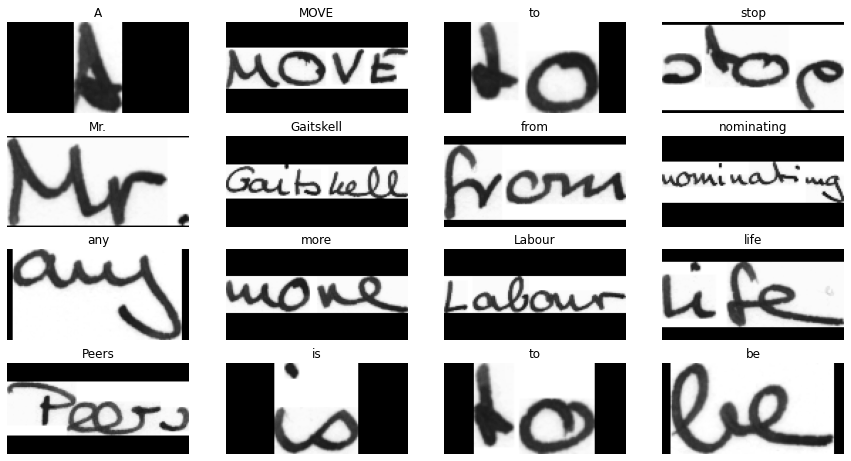

In [ ]:
for train_image in train_data.take(1):
    images, labels = train_image["image"], train_image["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        image_new = images[i]
        image_new = tf.image.flip_left_right(image_new)
        image_new = tf.transpose(image_new, perm=[1, 0, 2])
        image_new = (image_new * 255.).numpy().clip(0, 255).astype(np.uint8)
        image_new = image_new[:, :, 0]

        
        label_new = labels[i]
        indices = tf.gather(label_new, tf.where(tf.math.not_equal(label_new, padding_token)))
        
        label_new = tf.strings.reduce_join(number_to_character(indices))
        label_new = label_new.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(image_new, cmap="gray")
        ax[i // 4, i % 4].set_title(label_new)
        ax[i // 4, i % 4].axis("off")

        
plt.show()

In [ ]:
class ctc_layer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_function = keras.backend.ctc_batch_cost
    def get_congfig(self):
        config = super(ctc_layer, self).get_config()
        config.update({
            'loss_function':self.loss_function,
            'add_loss':self.add_loss
        })
        return config

    def call(self, true_input, true_pred):
        batch_length = tf.cast(tf.shape(true_input)[0], dtype="int64")
        input_len = tf.cast(tf.shape(true_pred)[1], dtype="int64")
        label_len = tf.cast(tf.shape(true_input)[1], dtype="int64")

        input_len = input_len * tf.ones(shape=(batch_length, 1), dtype="int64")
        label_len = label_len * tf.ones(shape=(batch_length, 1), dtype="int64")
        loss = self.loss_function(true_input, true_pred, input_len, label_len)
        self.add_loss(loss)

        
        return true_pred

In [ ]:
class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))




In [ ]:
def basic_model(): 
    input_image =  keras.Input(shape=(width, height, 1), name="image")
    labels =  keras.layers.Input(name="label", shape=(None,))
   
    # First conv block.
    x = keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same',use_bias=True,name='Conv1')(input_image)
    x =  keras.layers.MaxPooling2D(pool_size=(2, 2), name="pool1")(x)

    # Second conv block.
    x =  keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same',use_bias=True,name='Conv2')(x)
    x =  keras.layers.MaxPooling2D(pool_size=(2, 2), name="pool2")(x)
    
   
    new_size = ((width // 4), (height // 4) * 64)
    x =  keras.layers.Reshape(target_shape=new_size, name="reshape")(x)
    
    # RNNs.
    x =  keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(32,return_sequences=True,dropout=0.25))(x)
    x =  keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x =  keras.layers.Dropout(0.5)(x)
    x =  keras.layers.Dense(len(character_to_number.get_vocabulary()) + 1, activation="softmax", name="dense2")(x)
    
    output = ctc_layer(name="ctc_loss")(labels, x)

    model =  keras.models.Model(inputs=[input_image, labels], outputs=output, name="handwritten_recognition_system")
    
    optimizer = keras.optimizers.Adam()
    
    model.compile(optimizer=optimizer)
    return model

model = basic_model()
model.summary()

Model: "handwritten_recognition_system"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 64, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 32, 32)   0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 64, 32, 64)   18496       ['po

In [ ]:
model = basic_model()
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[EarlyStoppingAtMinLoss()])

Epoch 1/50
679/679 [==============================] - 71s 91ms/step - loss: 17.9200 - val_loss: 12.9367
Epoch 2/50
679/679 [==============================] - 60s 88ms/step - loss: 13.9321 - val_loss: 12.9749
Epoch 3/50
679/679 [==============================] - 59s 87ms/step - loss: 13.4108 - val_loss: 12.6256
Epoch 4/50
679/679 [==============================] - 59s 88ms/step - loss: 12.6687 - val_loss: 11.2367
Epoch 5/50
679/679 [==============================] - 59s 87ms/step - loss: 11.5487 - val_loss: 9.9339
Epoch 6/50
679/679 [==============================] - 60s 88ms/step - loss: 10.6721 - val_loss: 9.1213
Epoch 7/50
679/679 [==============================] - 59s 87ms/step - loss: 9.8509 - val_loss: 8.1197
Epoch 8/50
679/679 [==============================] - 59s 87ms/step - loss: 8.9012 - val_loss: 6.8642
Epoch 9/50
679/679 [==============================] - 59s 87ms/step - loss: 7.8327 - val_loss: 6.3047
Epoch 10/50
679/679 [==============================] - 59s 87ms/step - l

In [ ]:
new_basic_model = keras.models.Model(model.get_layer(name="image").input, model.get_layer(name="dense2").output)
new_basic_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 64, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 128, 64, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 32, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 64, 32, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 32, 16, 64)        0         
                                                                 
 reshape (Reshape)           (None, 32, 1024)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 32, 256)          118067

In [ ]:
def predictions_output(pred_text):
    input_len = np.ones(pred_text.shape[0]) * pred_text.shape[1]
    predicted_text = keras.backend.ctc_decode(pred_text, input_length=input_len, beam_width=10)[0][0][:, :maximum_len_word]
    
    recognised_text = []
    for predict in predicted_text:
        predict = tf.gather(predict, tf.where(tf.math.not_equal(predict, -1)))
        predict = tf.strings.reduce_join(number_to_character(predict)).numpy().decode("utf-8")
        recognised_text.append(predict)
    return recognised_text

In [ ]:
def ocr_metrics(predicts, ground_truth):
    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1)

    cer, wer = [], []

    for (pd, gt) in zip(predicts, ground_truth):
        pd, gt = pd.lower(), gt.lower()

        pd_cer, gt_cer = list(pd), list(gt)
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.split(), gt.split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))


    metrics = [cer, wer]
    metrics = np.mean(metrics, axis=1)

    return metrics

0.0
CER: 0.9507347470238097 and WER: 1.0


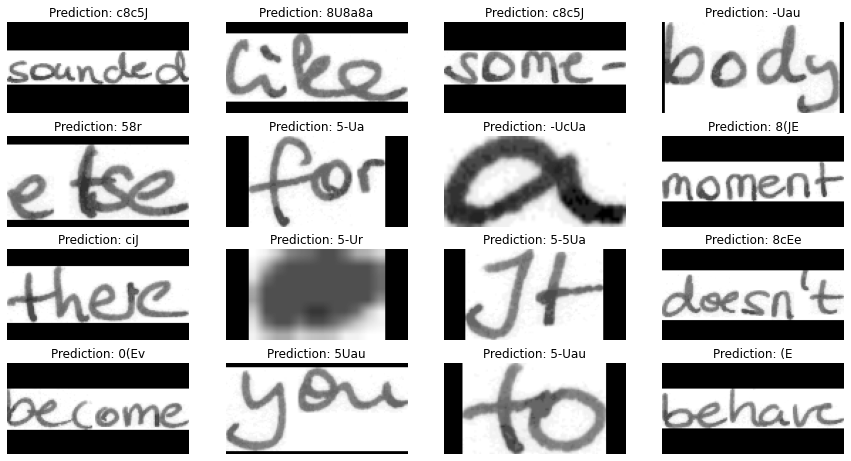

In [ ]:
for test in test_data.take(1):
    test_images, test_labels = test["image"], test["label"] 
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    prediction = new_basic_model.predict(test_images)
    prediction_text_basic = predictions_output(prediction)
    length = len(test_labels)

    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_basic[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_basic,test_list)
    print(f'CER: {cer} and WER: {wer}')

    for i in range(16):
        image_new = test_images[i]
        image_new = tf.image.flip_left_right(image_new)
        image_new = tf.transpose(image_new, perm=[1, 0, 2])
        image_new = (image_new * 255.).numpy().clip(0, 255).astype(np.uint8)
        image_new = image_new[:, :, 0]

        predicted_label = f"Prediction: {prediction_text_basic[i]}"
        ax[i // 4, i % 4].imshow(image_new, cmap="gray")
        ax[i // 4, i % 4].set_title(predicted_label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
class FullGatedConv2D(Conv2D):
    
    def __init__(self, filters, **kwargs):
        super(FullGatedConv2D, self).__init__(filters=filters * 2, **kwargs)
        self.nb_filters = filters

    def call(self, inputs):
        output = super(FullGatedConv2D, self).call(inputs)
        linear = Activation("linear")(output[:, :, :, :self.nb_filters])
        sigmoid = Activation("sigmoid")(output[:, :, :, self.nb_filters:])

        return Multiply()([linear, sigmoid])

    def compute_output_shape(self, input_shape):
        output_shape = super(FullGatedConv2D, self).compute_output_shape(input_shape)
        return tuple(output_shape[:3]) + (self.nb_filters * 2,)

    def get_config(self):
        config = super(FullGatedConv2D, self).get_config()
        config['nb_filters'] = self.nb_filters
        del config['filters']
        return config

In [ ]:
def flor_new():
  input_image =  keras.Input( shape=(width, height, 1), name="image")
  labels =  keras.layers.Input(name="label", shape=(None,))

  x = keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),kernel_initializer="he_uniform",padding="same",name="Conv1")(input_image)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)
  x = FullGatedConv2D(filters=16,kernel_size=(3,3),padding='same',name='Gatedconv1')(x)

  x = keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),kernel_initializer='he_uniform',padding='same',name='Conv2')(x)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)
  x = FullGatedConv2D(filters=32,kernel_size=(3,3),padding='same',name='GatedConv2')(x)

  x = keras.layers.Conv2D(filters=40,kernel_size=(2,4),strides=(2,4),kernel_initializer='he_uniform',padding='same',name='Conv3')(x)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)
  x = FullGatedConv2D(filters=40,kernel_size=(3,3),padding='same',name='GatedConv3')(x)

  x = keras.layers.Conv2D(filters=48,kernel_size=(3,3),strides=(1,1),kernel_initializer='he_uniform',padding='same',name='Conv4')(x)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)
  x = FullGatedConv2D(filters=48,kernel_size=(3,3),padding='same',name='GatedConv4')(x)

  x = keras.layers.Conv2D(filters=56,kernel_size=(2,4),strides=(2,4),kernel_initializer='he_uniform',padding='same',name='Conv5')(x)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)
  x = FullGatedConv2D(filters=56,kernel_size=(3,3),padding='same',name='GatedConv5')(x)

  x = keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),kernel_initializer='he_uniform',padding='same',name='Conv6')(x)
  x = keras.layers.PReLU(shared_axes=[1,2])(x)
  x = keras.layers.BatchNormalization(renorm=True)(x)

  x = keras.layers.MaxPooling2D(pool_size=(1,2),strides=(1,2),padding='valid',name='pool1')(x)

  new_size = ((width // 4), (height // 4) * 2)
  x =  keras.layers.Reshape(target_shape=new_size, name="reshape")(x) 


  #first RNN
  x = keras.layers.Dropout(0.5)(x)
  forward_layer = keras.layers.GRU(128, return_sequences=True)
  backward_layer = keras.layers.GRU(128, activation='relu', return_sequences=True,
                      go_backwards=True)
  x = keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)
  x = keras.layers.Dense(256,activation='relu',name='dense1')(x)

  #Second RNN
  x = keras.layers.Dropout(0.5)(x)
  forward_layer = keras.layers.GRU(128, return_sequences=True)
  backward_layer = keras.layers.GRU(128, activation='relu', return_sequences=True,
                      go_backwards=True)
  x = keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)

  x = keras.layers.Dense(len(character_to_number.get_vocabulary()) + 1, activation="softmax", name="dense2")(x)

  output = ctc_layer(name="ctc_loss")(labels, x)

  model_flor_new =  keras.models.Model(inputs=[input_image, labels], outputs=output, name="Flor_Model_new")
  optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

  model_flor_new.compile(optimizer=optimizer)
  return model_flor_new

model_flor_new = flor_new()
model_flor_new.summary()

Model: "Flor_Model_new"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 32, 16)   160         ['image[0][0]']                  
                                                                                                  
 p_re_lu (PReLU)                (None, 64, 32, 16)   16          ['Conv1[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 32, 16)  112         ['p_re_lu[0][0]']   

In [ ]:
model_flor_new = flor_new()
history = model_flor_new.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[EarlyStoppingAtMinLoss()])



Epoch 1/50
679/679 [==============================] - 145s 201ms/step - loss: 12.5136 - val_loss: 7.7727
Epoch 2/50
679/679 [==============================] - 134s 198ms/step - loss: 7.8905 - val_loss: 5.3723
Epoch 3/50
679/679 [==============================] - 134s 197ms/step - loss: 5.3534 - val_loss: 3.7450
Epoch 4/50
679/679 [==============================] - 134s 197ms/step - loss: 4.0324 - val_loss: 3.0277
Epoch 5/50
679/679 [==============================] - 134s 197ms/step - loss: 3.3366 - val_loss: 2.7582
Epoch 6/50
679/679 [==============================] - 134s 197ms/step - loss: 2.8953 - val_loss: 2.5437
Epoch 7/50
679/679 [==============================] - 135s 198ms/step - loss: 2.5797 - val_loss: 2.3463
Epoch 8/50
679/679 [==============================] - 136s 201ms/step - loss: 2.3443 - val_loss: 2.1990
Epoch 9/50
679/679 [==============================] - 136s 200ms/step - loss: 2.1567 - val_loss: 2.2078
Epoch 10/50
679/679 [==============================] - 136s 200

In [ ]:
new_model_flor = keras.models.Model(model_flor_new.get_layer(name="image").input, model_flor_new.get_layer(name="dense2").output)
new_model_flor.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 64, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 32, 16)        160       
                                                                 
 p_re_lu_54 (PReLU)          (None, 64, 32, 16)        16        
                                                                 
 batch_normalization_89 (Bat  (None, 64, 32, 16)       112       
 chNormalization)                                                
                                                                 
 Gatedconv1 (FullGatedConv2D  (None, 64, 32, 16)       4640      
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 64, 32, 32)        4640

Accuracy of Flor Model:  0.859375
CER: 0.05606398809523809 and WER: 0.140625


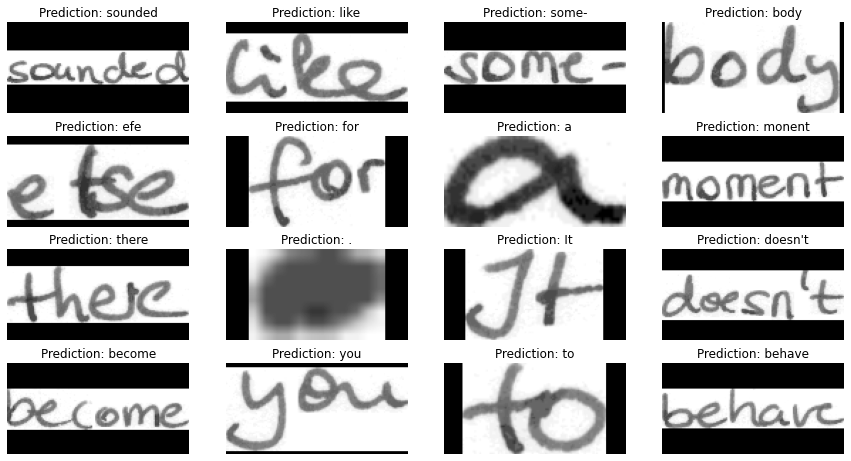

In [ ]:
for test in test_data.take(1):
    test_images,test_labels = test["image"],test["label"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    prediction = new_model_flor.predict(test_images)
    prediction_text_flor = predictions_output(prediction)
    length = len(test_labels)
    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_flor[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_flor,test_list)
    print(f'CER: {cer} and WER: {wer}')

    for i in range(16):
        image_new = test_images[i]
        image_new = tf.image.flip_left_right(image_new)
        image_new = tf.transpose(image_new, perm=[1, 0, 2])
        image_new = (image_new * 255.).numpy().clip(0, 255).astype(np.uint8)
        image_new = image_new[:, :, 0]

        predicted_label = f"Prediction: {prediction_text_flor[i]}"
        ax[i // 4, i % 4].imshow(image_new, cmap="gray")
        ax[i // 4, i % 4].set_title(predicted_label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
def puigcerver_model():
    input_image =  keras.Input(shape=(width, height, 1), name="image")
    labels =  keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform',name='Conv1')(input_image)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha=0.01)(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid',name="pool1")(x)

    # Second conv block.
    x =  keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform',name='Conv2')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha=0.01)(x)
    x =  keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid',name="pool2")(x)

    #Third Convolutional Layer
    x = keras.layers.Dropout(rate=0.2)(x)
    x = keras.layers.Conv2D(filters=48,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform',name='Conv3')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha=0.01)(x)
    x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid',name="pool3")(x)
    
    #Fourth Covolutional Layer
    x = keras.layers.Dropout(rate=0.2)(x)
    x = keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform',name='Conv4')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha=0.01)(x)
    
    #Fifth Convolutional Layer
    x = keras.layers.Dropout(rate=0.2)(x)
    x = keras.layers.Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),kernel_initializer='glorot_uniform',padding='same',name='Conv5')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha=0.01)(x)
    
    new_size = ((width // 4), (height // 4) * 20)
    x =  keras.layers.Reshape(target_shape=new_size, name="reshape")(x)
    
    # RNNs.
    x =  keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True,dropout=0.5))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True,dropout=0.5))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True,dropout=0.5))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True,dropout=0.5))(x)
    x =  keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True,dropout=0.5))(x)

    x = keras.layers.Dropout(rate=0.5)(x)
    x = keras.layers.Dense(len(character_to_number.get_vocabulary()) + 1, activation="softmax", name="dense1")(x)
    
    output = ctc_layer(name="ctc_loss")(labels, x)

    model_puigcerver =  keras.models.Model(inputs=[input_image, labels], outputs=output, name="Puigcerver_Model")
    optimizer = keras.optimizers.RMSprop()
    
    model_puigcerver.compile(optimizer=optimizer)
    return model_puigcerver

model_puigcerver = puigcerver_model()
model_puigcerver.summary()

Model: "Puigcerver_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 64, 16)  160         ['image[0][0]']                  
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 128, 64, 16)  64         ['Conv1[0][0]']                  
 rmalization)                                                                                     
                                                                                   

In [ ]:
model_puigcerver = puigcerver_model()
history = model_puigcerver.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[EarlyStoppingAtMinLoss()])

Epoch 1/50
679/679 [==============================] - 126s 151ms/step - loss: 13.5005 - val_loss: 9.9686
Epoch 2/50
679/679 [==============================] - 90s 132ms/step - loss: 10.2937 - val_loss: 7.9154
Epoch 3/50
679/679 [==============================] - 90s 132ms/step - loss: 8.8617 - val_loss: 7.6950
Epoch 4/50
679/679 [==============================] - 89s 130ms/step - loss: 7.8969 - val_loss: 6.2030
Epoch 5/50
679/679 [==============================] - 88s 129ms/step - loss: 7.0903 - val_loss: 5.4939
Epoch 6/50
679/679 [==============================] - 88s 129ms/step - loss: 6.3344 - val_loss: 4.5465
Epoch 7/50
679/679 [==============================] - 87s 129ms/step - loss: 5.5775 - val_loss: 5.8157
Epoch 8/50
679/679 [==============================] - 87s 129ms/step - loss: 4.8947 - val_loss: 4.3775
Epoch 9/50
679/679 [==============================] - 88s 129ms/step - loss: 4.3504 - val_loss: 3.3482
Epoch 10/50
679/679 [==============================] - 87s 128ms/step 

In [ ]:
new_puigcerver_model = keras.models.Model(model_puigcerver.get_layer(name="image").input, model_puigcerver.get_layer(name="dense1").output)
new_puigcerver_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 64, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 128, 64, 16)       160       
                                                                 
 batch_normalization_11 (Bat  (None, 128, 64, 16)      64        
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128, 64, 16)       0         
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 32, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 64, 32, 32)        4640      
                                                             

0.875
CER: 0.06448412698412698 and WER: 0.125


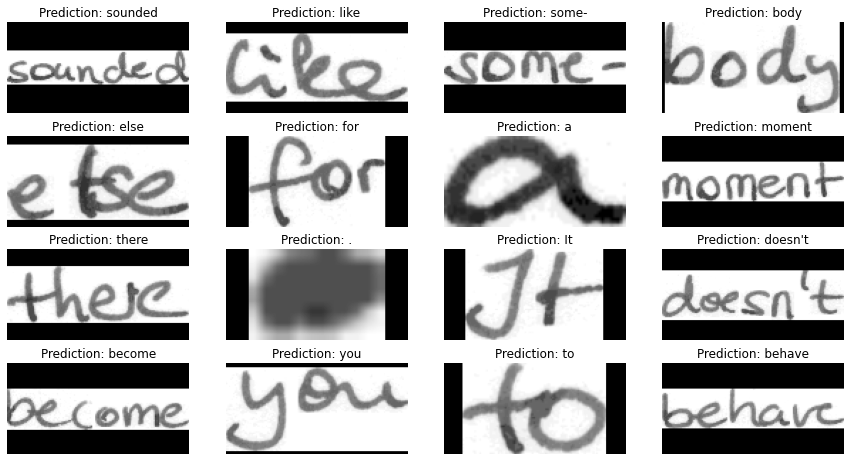

In [ ]:
for test in test_data.take(1):
    test_images, test_labels = test["image"], test["label"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    prediction = new_puigcerver_model.predict(test_images)
    prediction_text_puigcerver = predictions_output(prediction)
    length = len(test_labels)
    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_puigcerver[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_puigcerver,test_list)
    print(f'CER: {cer} and WER: {wer}')

    for i in range(16):
        image_new = test_images[i]
        image_new = tf.image.flip_left_right(image_new)
        image_new = tf.transpose(image_new, perm=[1, 0, 2])
        image_new = (image_new * 255.).numpy().clip(0, 255).astype(np.uint8)
        image = image_new[:, :, 0]

        predicted_label = f"Prediction: {prediction_text_puigcerver[i]}"
        ax[i // 4, i % 4].imshow(image_new, cmap="gray")
        ax[i // 4, i % 4].set_title(predicted_label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
for batch in test_data.take(1):
    batch_images, batch_labels = batch["image"],batch["label"]
    
    prediction = new_puigcerver_model.predict(batch_images)
    prediction_text_puigcerver = predictions_output(prediction)
    length = len(batch_labels)
    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_puigcerver[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_puigcerver,test_list)
    print(f'CER: {cer} and WER: {wer}')


0.421875
CER: 0.3279265873015873 and WER: 0.578125


In [ ]:
class GatedConv2D(Conv2D):
    def __init__(self, **kwargs):
        super(GatedConv2D, self).__init__(**kwargs)

    def call(self, inputs):
        output = super(GatedConv2D, self).call(inputs)
        linear = Activation("linear")(inputs)
        sigmoid = Activation("sigmoid")(output)

        return Multiply()([linear, sigmoid])

    

In [ ]:
def bluche_model_new():
  input_image = keras.Input(shape=(width,height,1),name='image')
  labels = keras.layers.Input(name='label',shape=(None,))
  
  x = keras.layers.Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),kernel_initializer='glorot_uniform',activation='tanh',padding='same',name='conv1')(input_image)
  x = keras.layers.Conv2D(filters=16,kernel_size=(2,4),strides=(2,4),kernel_initializer='glorot_uniform',activation='tanh',padding='same',name='conv2')(x)
  x = GatedConv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',name='gatedconv1')(x)
  
  
  x = keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),kernel_initializer='glorot_uniform',activation='tanh',padding='same',name='conv3')(x)
  x= GatedConv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='gatedconv2')(x)

  
  x = keras.layers.Conv2D(filters=64,kernel_size=(2,4),strides=(2,4),kernel_initializer='glorot_uniform',activation='tanh',padding='same',name='Conv4')(x)
  x = GatedConv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='gatedconv3')(x)
  
  
  x = keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),kernel_initializer='glorot_uniform',activation='tanh',padding='same',name='conv5')(x)
  x = keras.layers.MaxPooling2D(pool_size=(1,4),strides=(1,4),padding='valid',name='pool1')(x)      

  new_size = ((width // 4), (height // 4) * 8)
  x =  keras.layers.Reshape(target_shape=new_size, name="reshape")(x)  

  #firstRNN
  forward_layer = keras.layers.LSTM(128, return_sequences=True)
  backward_layer = keras.layers.LSTM(128, activation='relu', return_sequences=True,
                       go_backwards=True)
  x = keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)
  x = keras.layers.Dense(units=128,activation='tanh')(x)
  
  #SecondRNN
  forward_layer = keras.layers.LSTM(128, return_sequences=True)
  backward_layer = keras.layers.LSTM(128, activation='relu', return_sequences=True,
                       go_backwards=True)
  x = keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)

  x = keras.layers.Dense(len(character_to_number.get_vocabulary()) + 1, activation="softmax", name="dense2")(x)
  output = ctc_layer(name="ctc_loss")(labels, x)

  model_bluche_new =  keras.models.Model(inputs=[input_image, labels], outputs=output, name="Bluche_Model_new")

  optimizer = keras.optimizers.RMSprop(learning_rate=0.0004)
  model_bluche_new.compile(optimizer=optimizer)
  
  return model_bluche_new                                                                                                 
model_bluche_new = bluche_model_new()
model_bluche_new.summary()

Model: "Bluche_Model_new"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 64, 8)   80          ['image[0][0]']                  
                                                                                                  
 conv2 (Conv2D)                 (None, 64, 16, 16)   1040        ['conv1[0][0]']                  
                                                                                                  
 gatedconv1 (GatedConv2D)       (None, 64, 16, 16)   2320        ['conv2[0][0]']   

In [ ]:
model_bluche_new = bluche_model_new()
history = model_bluche_new.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    callbacks=[EarlyStoppingAtMinLoss()])


Epoch 1/5
679/679 [==============================] - 109s 152ms/step - loss: 15.1595 - val_loss: 12.0889
Epoch 2/5
679/679 [==============================] - 102s 150ms/step - loss: 13.1259 - val_loss: 11.6077
Epoch 3/5
679/679 [==============================] - 101s 149ms/step - loss: 12.0892 - val_loss: 10.6763
Epoch 4/5
679/679 [==============================] - 99s 146ms/step - loss: 11.2404 - val_loss: 9.7100
Epoch 5/5
679/679 [==============================] - 100s 147ms/step - loss: 10.5856 - val_loss: 9.1582


In [ ]:
new_model_bluche = keras.models.Model(model_bluche_new.get_layer(name="image").input, model_bluche_new.get_layer(name="dense2").output)
new_model_bluche.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 128, 64, 8)        80        
                                                                 
 conv2 (Conv2D)              (None, 64, 16, 16)        1040      
                                                                 
 gatedconv1 (GatedConv2D)    (None, 64, 16, 16)        2320      
                                                                 
 conv3 (Conv2D)              (None, 64, 16, 32)        4640      
                                                                 
 gatedconv2 (GatedConv2D)    (None, 64, 16, 32)        9248      
                                                                 
 Conv4 (Conv2D)              (None, 32, 4, 64)         1644

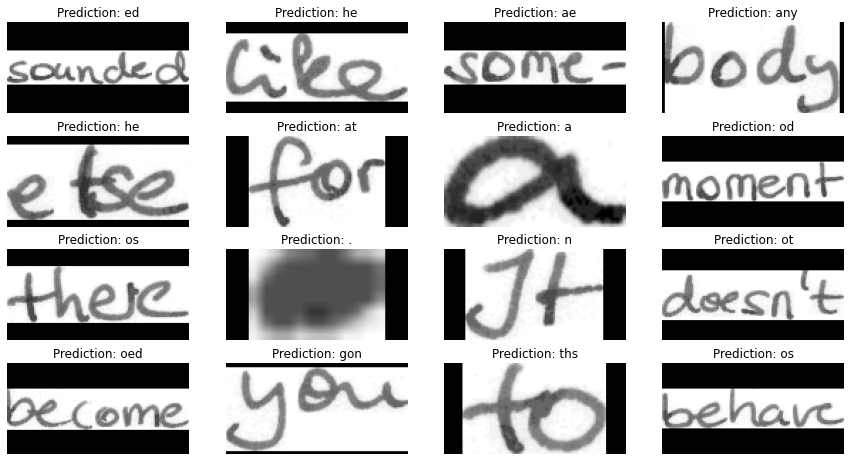

In [ ]:
for test in test_data.take(1):
    test_images,test_labels = test["image"],test["label"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    prediction = new_model_bluche.predict(test_images)
    prediction_text_bluche = predictions_output(prediction)
    length = len(test_labels)
    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_bluche[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_bluche,test_list)
    print(f'CER: {cer} and WER: {wer}')


    for i in range(16):
        image_new = test_images[i]
        image_new = tf.image.flip_left_right(image_new)
        image_new = tf.transpose(image_new, perm=[1, 0, 2])
        image_new = (image_new * 255.).numpy().clip(0, 255).astype(np.uint8)
        image_new = image_new[:, :, 0]

        predicted_text = f"Prediction: {prediction_text_bluche[i]}"
        ax[i // 4, i % 4].imshow(image_new, cmap="gray")
        ax[i // 4, i % 4].set_title(predicted_text)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
for test in test_data.take(1):
    batch_images, batch_labels = batch["image"],batch["label"]
    
    prediction = new_model_bluche.predict(test_images)
    prediction_text_bluche = predictions_output(prediction)
    length = len(batch_labels)
    count = 0

    for i in range(length):
      if test_list[i] == prediction_text_bluche[i]:
        count += 1
    print(count/length)
    cer, wer = ocr_metrics(prediction_text_bluche,test_list)
    print(f'CER: {cer} and WER: {wer}')


0.15625
CER: 0.665101066468254 and WER: 0.84375
